# Tutorial 2 Homework
## Active Galactic Nuclei
### MASS S2

### Q1
Use SDSS DR18 SQL search to find all galaxies which have only:

- the narrow emission lines (FWHM < 500 km/s),
- high median signal to noise ratio in g band (S/N > 40) and,
- fluxes of lines: [O III] 5007, Hβ, Hα and [N II] 6583 larger than 5 e-17 erg/s/cm^2.

Set criteria so that the fluxes are larger than errors in flux multiplied with 5 in order to get good results. SQL output should be the fluxes of these lines.

### Answer
We will form our SQL string according to the requirememnts described above.

In [1]:
from astroquery.sdss import SDSS

In [2]:
query_str = """SELECT s.specobjid, g.oiii_5007_flux, g.h_beta_flux, g.h_alpha_flux, g.nii_6584_flux

FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid

WHERE
    s.class = 'GALAXY'
AND g.sigma_balmer < 500/2.335
AND g.sigma_forbidden < 500/2.335
AND s.snmedian_g > 40
AND g.oiii_5007_flux > 5
AND g.oiii_5007_flux > g.oiii_5007_flux_err * 5
AND g.h_beta_flux > 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux > 5
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.nii_6584_flux > 5
AND g.nii_6584_flux > g.nii_6584_flux_err * 5"""

bpt_df = SDSS.query_sql(query_str).to_pandas()
bpt_df

,specobjid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux
0,3088402889551407104,2322.26300,2452.82900,11302.42000,6562.3330
1,2027865098961315840,92.37119,55.98993,170.21040,227.0901
2,413269895623501824,78.43416,115.02330,612.87900,497.0024
3,1969337531853989888,66.67204,48.74186,161.17450,194.1384
4,1002210389611538432,140.61490,67.60653,162.47410,146.2638
...,...,...,...,...,...
970,2937576561018169344,174.84740,104.20960,304.21750,462.9719
971,2519789075951544320,7762.54400,2775.85400,9702.91000,1268.2150
972,2519928164172457984,51.74230,21.70620,80.52386,105.8059
973,564146534447343616,133.82920,463.12620,1859.10600,963.9767


### Q2
For the obtained sample make the diagnostic BPT (Baldwin, Philips and Terlevich) diagram. This diagram determines the dominant ionization source for the objects: accretion disk (AGN) or hot emission stars (H II - star-burst region). For the BPT diagram use the flux ratios of the lines: [O III] 5007/Hβ vs. [NII] 6583/Hα.

### Answers
We will create columns $\log([NII]~\lambda 6584~/~H \alpha)$ and $\log([OIII]~\lambda 5007~/~H \beta)$ in our dataframe and plot them.

In [3]:
import numpy as np

In [4]:
bpt_df['log_oiii/hb'] = bpt_df.apply(lambda row: np.log10(row.oiii_5007_flux / row.h_beta_flux), axis=1)
bpt_df['log_nii/ha'] = bpt_df.apply(lambda row: np.log10(row.nii_6584_flux / row.h_alpha_flux), axis=1)

bpt_df

,specobjid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,log_oiii/hb,log_nii/ha
0,3088402889551407104,2322.26300,2452.82900,11302.42000,6562.3330,-0.023756,-0.236113
1,2027865098961315840,92.37119,55.98993,170.21040,227.0901,0.217427,0.125212
2,413269895623501824,78.43416,115.02330,612.87900,497.0024,-0.166281,-0.091016
3,1969337531853989888,66.67204,48.74186,161.17450,194.1384,0.136042,0.080815
4,1002210389611538432,140.61490,67.60653,162.47410,146.2638,0.318043,-0.045647
...,...,...,...,...,...,...,...
970,2937576561018169344,174.84740,104.20960,304.21750,462.9719,0.224751,0.182370
971,2519789075951544320,7762.54400,2775.85400,9702.91000,1268.2150,0.446607,-0.883709
972,2519928164172457984,51.74230,21.70620,80.52386,105.8059,0.377262,0.118585
973,564146534447343616,133.82920,463.12620,1859.10600,963.9767,-0.539148,-0.285238


In [5]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

Text(0.5, 1.0, 'BPT Diagram for our Sample of 975 Galaxies')

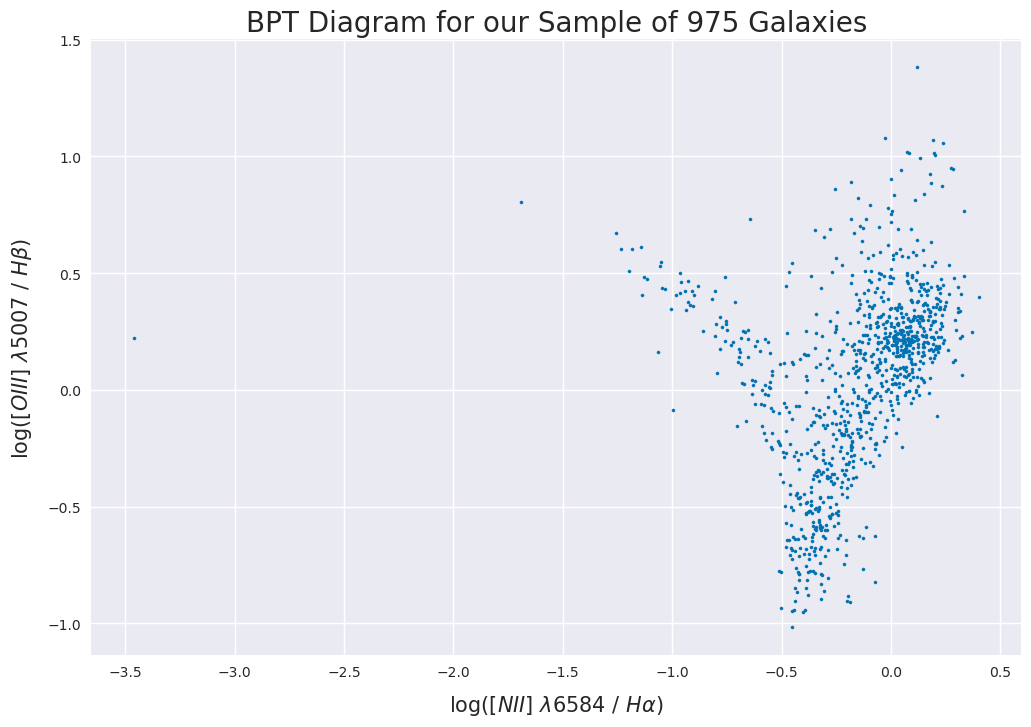

In [6]:
num_gals_bpt = len(bpt_df)

plt.figure(figsize=(12,8))

plt.scatter(bpt_df['log_nii/ha'], bpt_df['log_oiii/hb'], s=5)

plt.xlabel(r'$\log([NII]~\lambda 6584~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of {} Galaxies'.format(num_gals_bpt), size=20)

We will now use the Kauffmann et. al. (2003) paper to plot the demarcation line between star-forming and and AGN galaxies.

Text(0.5, 1.0, 'BPT Diagram for our Sample of 975 Galaxies')

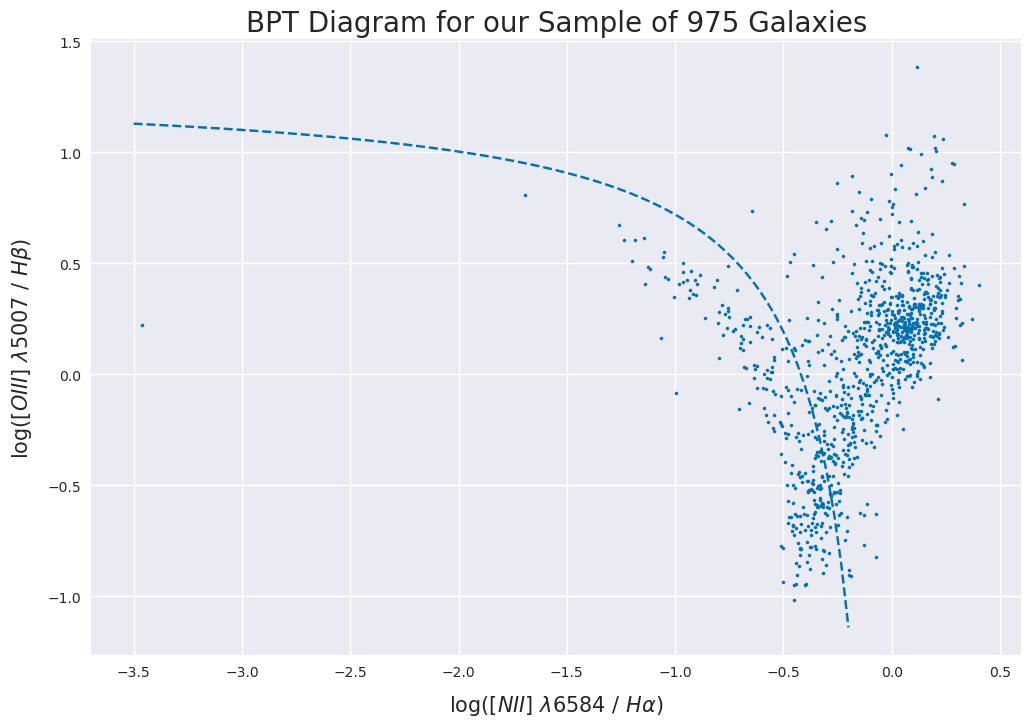

In [7]:
def demarcation_curve(log_nii_ha):
    return (0.61 / (log_nii_ha - 0.05)) + 1.3

plt.figure(figsize=(12,8))

plt.scatter(bpt_df['log_nii/ha'], bpt_df['log_oiii/hb'], s=5)

fn_x_arr = np.linspace(-3.5, -0.2, 100)
fn_y_arr = demarcation_curve(fn_x_arr)

plt.plot(fn_x_arr, fn_y_arr, '--')

plt.xlabel(r'$\log([NII]~\lambda 6584~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of {} Galaxies'.format(num_gals_bpt), size=20)

Here, the galaxies above the dashed line are defined to be AGNs

### Q3

For the sample of galaxies selected from SDSS database in Part 1, find the corresponding WISE colours using WISE fluxes from the Cross-identifications link: https://skyserver.sdss.org/dr14/en/help/docs/realquery.aspx#wisexmatch

### Answer

We will use the Wise X Match table to get Wise colour magnitudes for all the galaxies in Part 1.

In [8]:
wise_sql_str = """SELECT s.specobjid, x.sdss_objid, w.w1mpro, w.w2mpro, w.w3mpro

FROM SpecObj AS s
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid
JOIN wise_xmatch AS x ON s.bestObjID = x.sdss_objid
JOIN wise_allsky as w ON x.wise_cntr = w.cntr

WHERE
    s.class = 'GALAXY'
AND g.sigma_balmer < 500/2.335
AND g.sigma_forbidden < 500/2.335
AND s.snmedian_g > 40
AND g.oiii_5007_flux > 5
AND g.oiii_5007_flux > g.oiii_5007_flux_err * 5
AND g.h_beta_flux > 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux > 5
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.nii_6584_flux > 5
AND g.nii_6584_flux > g.nii_6584_flux_err * 5"""

wise_df = SDSS.query_sql(wise_sql_str).to_pandas()
wise_df

,specobjid,sdss_objid,w1mpro,w2mpro,w3mpro
0,2165278474745440256,1237664835387064413,12.812,12.661,8.762
1,1005512498008320000,1237657595686879337,12.089,11.908,7.834
2,1874774302792902656,1237661056355598369,11.788,11.846,10.846
3,488769783811041280,1237651272955658365,11.786,11.865,10.222
4,972950181760755712,1237657774467383343,10.846,10.780,7.186
...,...,...,...,...,...
956,564120695924090880,1237653664185516095,11.658,11.640,8.881
957,549540891476387840,1237651540317306913,11.924,11.915,8.715
958,323230613983225856,1237674650466516995,12.121,12.049,8.754
959,3343996467592325120,1237665230522679486,11.607,11.639,10.421


Let's now plot the $W1 - W2$ and $W2 - W3$ graph.

In [9]:
wise_df['w1-w2'] = wise_df.apply(lambda row: row.w1mpro - row.w2mpro, axis=1)
wise_df['w2-w3'] = wise_df.apply(lambda row: row.w2mpro - row.w3mpro, axis=1)

wise_df

,specobjid,sdss_objid,w1mpro,w2mpro,w3mpro,w1-w2,w2-w3
0,2165278474745440256,1237664835387064413,12.812,12.661,8.762,0.151,3.899
1,1005512498008320000,1237657595686879337,12.089,11.908,7.834,0.181,4.074
2,1874774302792902656,1237661056355598369,11.788,11.846,10.846,-0.058,1.000
3,488769783811041280,1237651272955658365,11.786,11.865,10.222,-0.079,1.643
4,972950181760755712,1237657774467383343,10.846,10.780,7.186,0.066,3.594
...,...,...,...,...,...,...,...
956,564120695924090880,1237653664185516095,11.658,11.640,8.881,0.018,2.759
957,549540891476387840,1237651540317306913,11.924,11.915,8.715,0.009,3.200
958,323230613983225856,1237674650466516995,12.121,12.049,8.754,0.072,3.295
959,3343996467592325120,1237665230522679486,11.607,11.639,10.421,-0.032,1.218


Text(0.5, 1.0, '$W2-W3$ vs. $W1-W2$ for our Sample of 961 Galaxies')

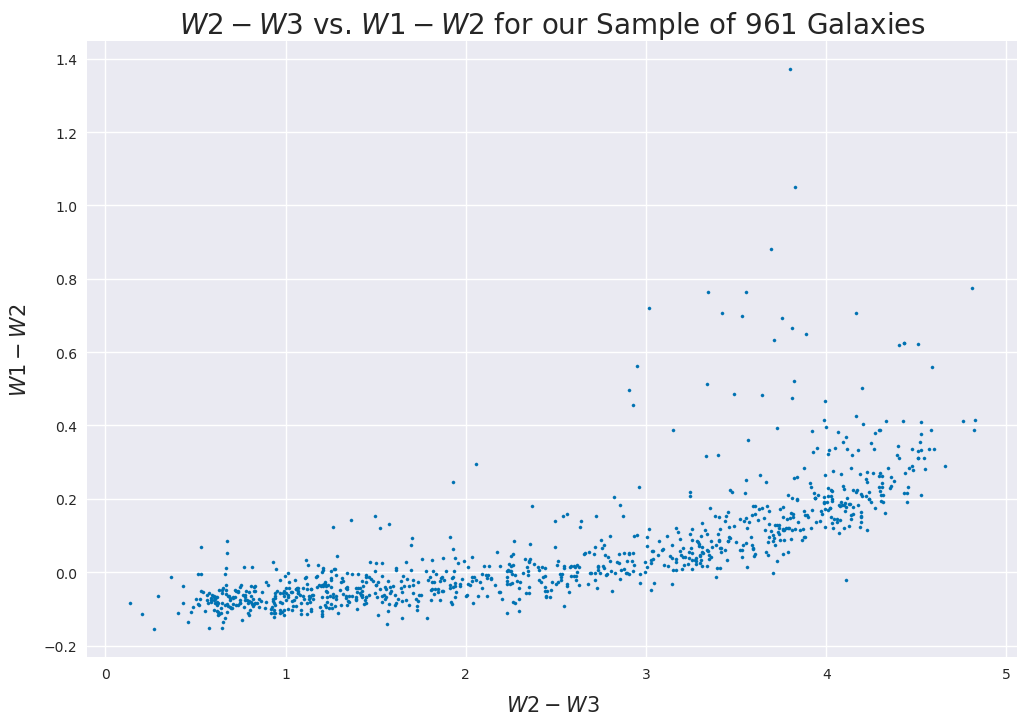

In [10]:
num_gals_wise = len(wise_df)

plt.figure(figsize=(12,8))

plt.scatter(wise_df['w2-w3'], wise_df['w1-w2'], s=5)

plt.xlabel(r'$W2 - W3$', size=15, labelpad=10)
plt.ylabel(r'$W1 - W2$', size=15, labelpad=10)

plt.title('$W2-W3$ vs. $W1-W2$ for our Sample of {} Galaxies'.format(num_gals_wise), size=20)

### Q4
Assign classes (AGN and (u)LIRGS, Spheroids, Intermediate Disks, and Star Forming Disks) to all objects in the sample using the thresholds from the image on the bottom right (dashed lines). How do these classes compare to the ones obtained using BPT diagram from Part 1?

### Answer
Let us now apply thethresholds from the Figure 11 in Jarrett et. al. (2017). From the image, we can apply the following conditions:
- If $W1-W2 > 0.8$, then AGN and uLIRGS. Else:
    - If $W2-W3 < 2$, then Spheroids
    - if $2 < W2-W3 < 3.5$, then Intermediate Disks
    - if $W2-W3 > 3.5$, then SF Disks

In [11]:
def classify(row):
    if row['w1-w2'] > 0.8:
        return 'AGN_uLIRGS'
    if row['w2-w3'] < 2:
        return 'Spheroids'
    if row['w2-w3'] > 3.5:
        return 'SF Disks'
    else:
        return 'Intermediate Disks'

wise_df['class'] = wise_df.apply(classify, axis=1)
wise_df

,specobjid,sdss_objid,w1mpro,w2mpro,w3mpro,w1-w2,w2-w3,class
0,2165278474745440256,1237664835387064413,12.812,12.661,8.762,0.151,3.899,SF Disks
1,1005512498008320000,1237657595686879337,12.089,11.908,7.834,0.181,4.074,SF Disks
2,1874774302792902656,1237661056355598369,11.788,11.846,10.846,-0.058,1.000,Spheroids
3,488769783811041280,1237651272955658365,11.786,11.865,10.222,-0.079,1.643,Spheroids
4,972950181760755712,1237657774467383343,10.846,10.780,7.186,0.066,3.594,SF Disks
...,...,...,...,...,...,...,...,...
956,564120695924090880,1237653664185516095,11.658,11.640,8.881,0.018,2.759,Intermediate Disks
957,549540891476387840,1237651540317306913,11.924,11.915,8.715,0.009,3.200,Intermediate Disks
958,323230613983225856,1237674650466516995,12.121,12.049,8.754,0.072,3.295,Intermediate Disks
959,3343996467592325120,1237665230522679486,11.607,11.639,10.421,-0.032,1.218,Spheroids


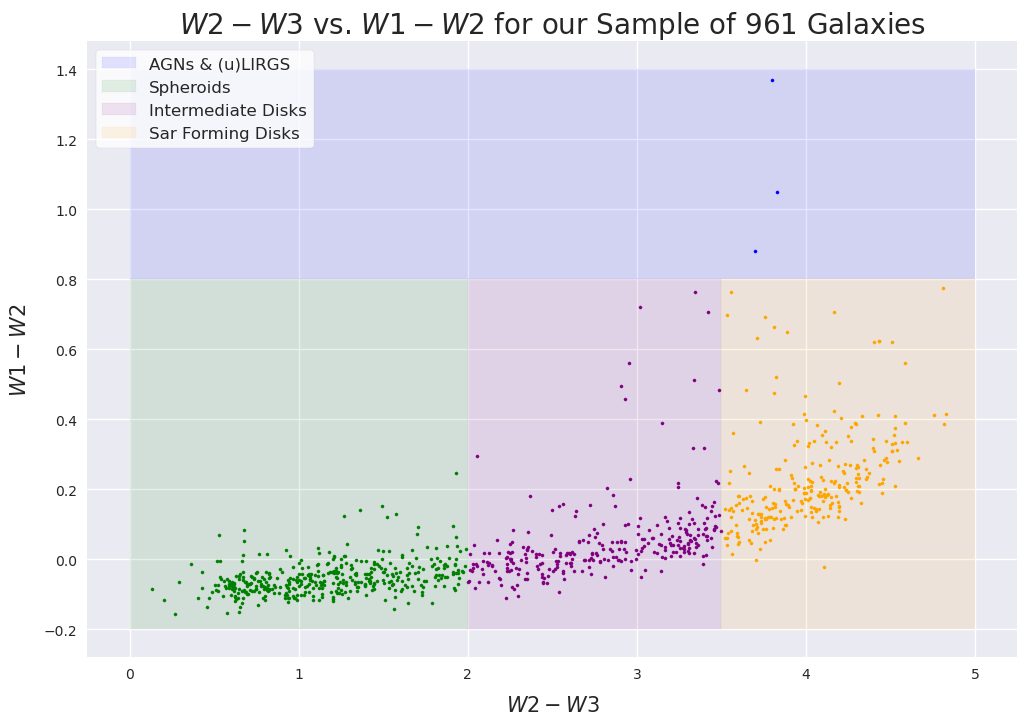

In [12]:
agn_ulirgs_df = wise_df[wise_df['class'] == 'AGN_uLIRGS']
spheroid_df = wise_df[wise_df['class'] == 'Spheroids']
id_df = wise_df[wise_df['class'] == 'Intermediate Disks']
sf_df = wise_df[wise_df['class'] == 'SF Disks']

plt.figure(figsize=(12,8))

plt.scatter(agn_ulirgs_df['w2-w3'], agn_ulirgs_df['w1-w2'], s=5, c='blue')
plt.scatter(spheroid_df['w2-w3'], spheroid_df['w1-w2'], s=5, c='green')
plt.scatter(id_df['w2-w3'], id_df['w1-w2'], s=5, c='purple')
plt.scatter(sf_df['w2-w3'], sf_df['w1-w2'], s=5, c='orange')

plt.fill_between([0, 5], 1.4, 0.8, alpha=0.1, color='blue', label='AGNs & (u)LIRGS')
plt.fill_between([0, 2], 0.8, -0.2, alpha=0.1, color='green', label='Spheroids')
plt.fill_between([2, 3.5], 0.8, -0.2, alpha=0.1, color='purple', label='Intermediate Disks')
plt.fill_between([3.5, 5], 0.8, -0.2, alpha=0.1, color='orange', label='Sar Forming Disks')

plt.xlabel(r'$W2 - W3$', size=15, labelpad=10)
plt.ylabel(r'$W1 - W2$', size=15, labelpad=10)

plt.title('$W2-W3$ vs. $W1-W2$ for our Sample of {} Galaxies'.format(num_gals_wise), size=20)
plt.legend(facecolor='white', frameon=True, fontsize=12, loc='upper left')

These classes divide the same sample of galaxies (barring ~10 which is likely because of the unavailibility of WISE colours for them) into 4 groups rather than the two from the BPT diagram (AGN vs. Star Forming). This gives us a lot more classification information. We also see a lot galaxies being classified as AGNs compared with the 3 in the WISE color method.

### Q5
Locate one random object on the WISE colour-colour plot having $W1-W2 \geq 0.8$ (Assef et. al. 2013) and address the following:
- Where is the object located in this plot? Mark it clearly on the graph.
- Does it agree with the optical classification from the BPT diagram?
- Draw some conclusions about the type of AGN using the WISE colour-colour plot.

### Answer
We will select a random object in the "AGNs & (u)LIRGS" rigion on the colour-colour plot and mark it with a star symbol.

In [13]:
random_gal = agn_ulirgs_df.sample()
random_gal

,specobjid,sdss_objid,w1mpro,w2mpro,w3mpro,w1-w2,w2-w3,class
786,2383626653969442816,1237665103282372621,10.131,9.081,5.255,1.05,3.826,AGN_uLIRGS


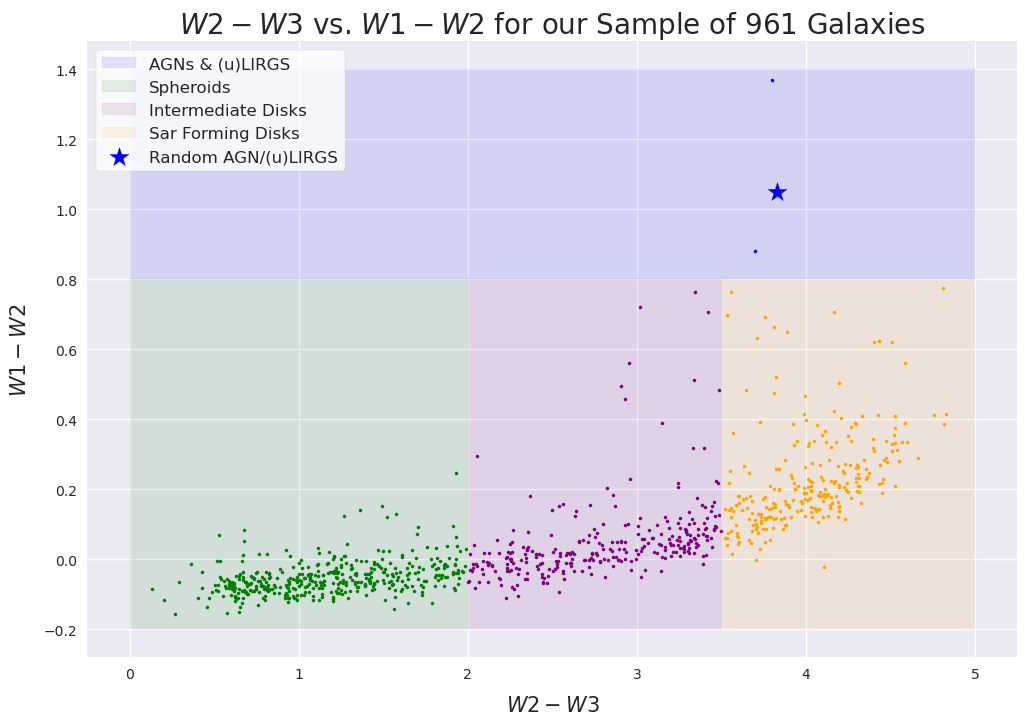

In [14]:
plt.figure(figsize=(12,8))

plt.scatter(agn_ulirgs_df['w2-w3'], agn_ulirgs_df['w1-w2'], s=5, c='blue')
plt.scatter(spheroid_df['w2-w3'], spheroid_df['w1-w2'], s=5, c='green')
plt.scatter(id_df['w2-w3'], id_df['w1-w2'], s=5, c='purple')
plt.scatter(sf_df['w2-w3'], sf_df['w1-w2'], s=5, c='orange')

plt.fill_between([0, 5], 1.4, 0.8, alpha=0.1, color='blue', label='AGNs & (u)LIRGS')
plt.fill_between([0, 2], 0.8, -0.2, alpha=0.1, color='green', label='Spheroids')
plt.fill_between([2, 3.5], 0.8, -0.2, alpha=0.1, color='purple', label='Intermediate Disks')
plt.fill_between([3.5, 5], 0.8, -0.2, alpha=0.1, color='orange', label='Sar Forming Disks')

plt.scatter(random_gal['w2-w3'], random_gal['w1-w2'], marker='*', s=200, c='blue', label='Random AGN/(u)LIRGS')

plt.xlabel(r'$W2 - W3$', size=15, labelpad=10)
plt.ylabel(r'$W1 - W2$', size=15, labelpad=10)

plt.title('$W2-W3$ vs. $W1-W2$ for our Sample of {} Galaxies'.format(num_gals_wise), size=20)
plt.legend(facecolor='white', frameon=True, fontsize=12, loc='upper left')

We will mark the same galaxy on the BPT diagram to see if the classifications between the two methods agree.

In [15]:
random_gal_bpt = bpt_df[bpt_df['specobjid'] == random_gal['specobjid'].values[0]]
random_gal_bpt

,specobjid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,log_oiii/hb,log_nii/ha
616,2383626653969442816,4433.455,569.2051,2661.47,1745.936,0.891474,-0.183093


Text(0.5, 1.0, 'BPT Diagram for our Sample of 975 Galaxies')

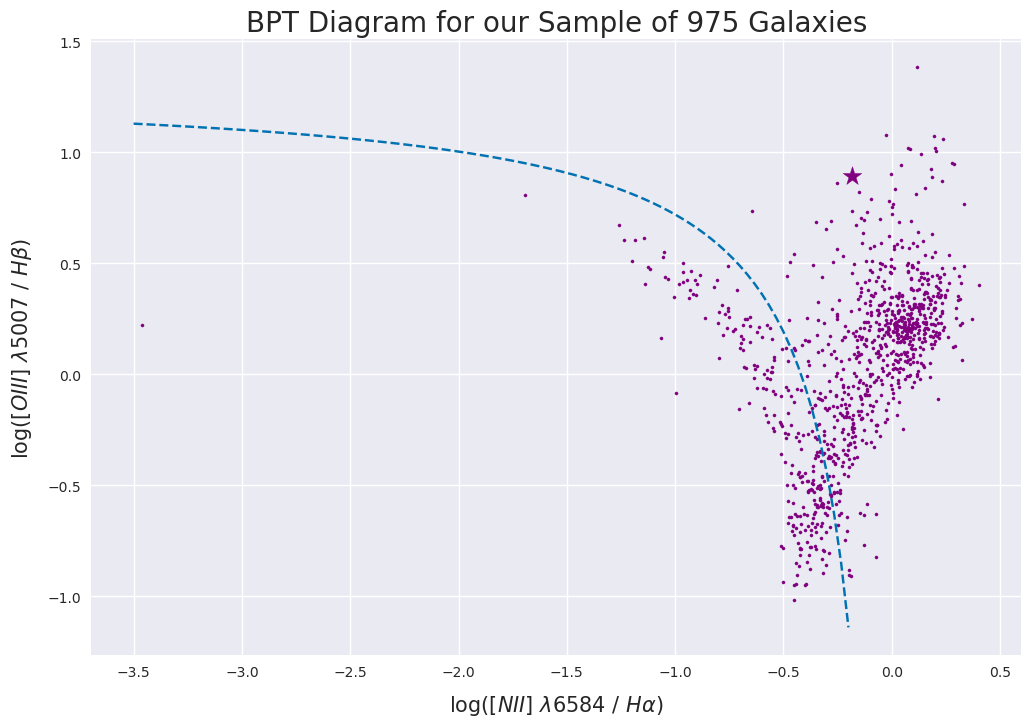

In [16]:
plt.figure(figsize=(12,8))

plt.scatter(bpt_df['log_nii/ha'], bpt_df['log_oiii/hb'], s=5, c='purple')

fn_x_arr = np.linspace(-3.5, -0.2, 100)
fn_y_arr = demarcation_curve(fn_x_arr)

plt.plot(fn_x_arr, fn_y_arr, '--')

plt.scatter(random_gal_bpt['log_nii/ha'], random_gal_bpt['log_oiii/hb'], marker='*', s=200, label='Random AGN/(u)LIRGS', c='purple')

plt.xlabel(r'$\log([NII]~\lambda 6584~/~H \alpha)$', size=15, labelpad=10)
plt.ylabel(r'$\log([OIII]~\lambda 5007~/~H \beta)$', size=15, labelpad=10)

plt.title('BPT Diagram for our Sample of {} Galaxies'.format(num_gals_bpt), size=20)

The same galaxy shown on the BPT diagram is classified as an AGN there as well, so they both agree.

The colour-colour plot also tells that the galaxy we selected has a $W2-W3$ colour index similar to SF galaxies but is differenciated form them by having a larger $W1-W2$ colour index.